# Email Spam Detection

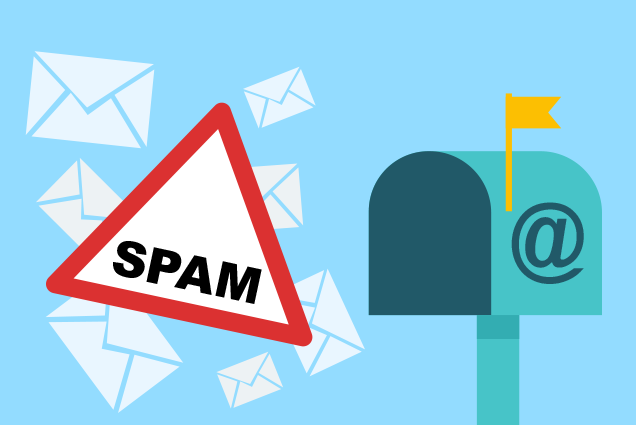

In [96]:
from IPython.display import Image
img = 'spam.PNG' 
Image(filename=img)

## Importing necessary libraries and Dataset

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

In [98]:
df = pd.read_csv('spam.csv', encoding='latin-1')

## Exploratory Data Analysis

In [99]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [101]:
df.shape

(5572, 5)

## Data Cleaning

In [102]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [103]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
df.describe(include='object')

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Dropping Null Values

In [105]:
df.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [106]:
df = df.dropna()
df.isnull().sum()

v1    0
v2    0
dtype: int64

## Feature Engineering

## Naming Convention

In [107]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [108]:
df.columns = ['type','text']
df.head(4)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


### Handling Duplicate Values

In [109]:
df['text'].nunique()


5169

In [110]:
#Let's drop the duplicate values in text column
df['text'].drop_duplicates(inplace = True)

In [111]:
df.head()
df.dtypes

type    object
text    object
dtype: object

## Data Visualization

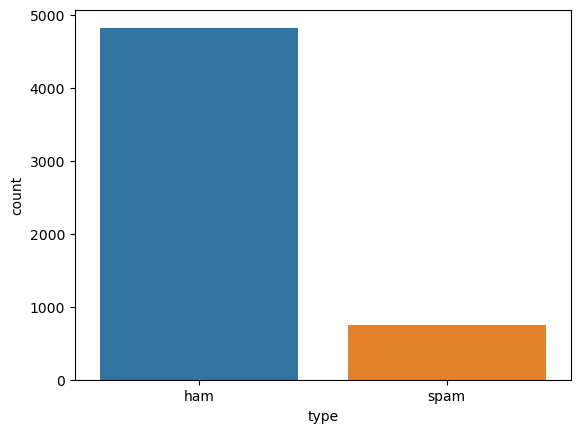

 The Bar graph indicates the types of messages


In [112]:
sns.countplot(x='type', data=df)
plt.show()
print(" The Bar graph indicates the types of messages")

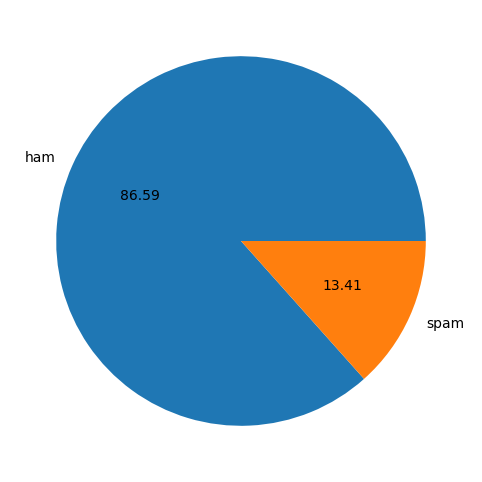

Pie-chart of 'Type' of message


In [113]:
plt.figure(figsize=(12,6))
plt.pie(df['type'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()
print("Pie-chart of 'Type' of message")

## MODEL TRAINING

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Metrics for Evaluating Models

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Defining the feature matrix

In [116]:
X = df.text # X_feature
y = df.type # y_label

### Data Splitting

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

count_vectorizer.fit(X_train)
X_train_cv = count_vectorizer.transform(X_train)
tfidf_transformer.fit(X_train_cv)
X_train_tfidf = tfidf_transformer.transform(X_train_cv)

X_test_cv = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)

## Multinomial Naive bayes model

In [125]:
naiv_bayes = MultinomialNB()
naiv_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

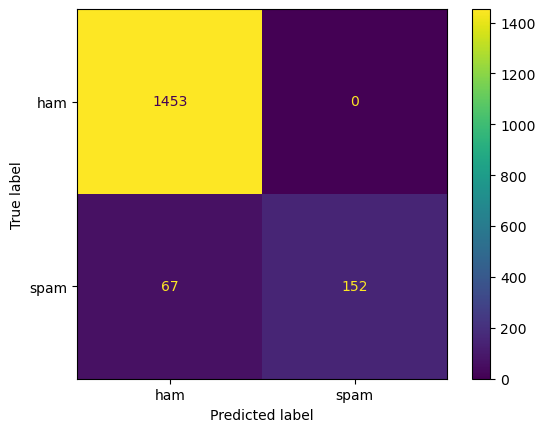

In [126]:
y_pred = naiv_bayes.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(naiv_bayes, X_test_tfidf, y_test)
plt.show()

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.69      0.82       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



## Decision Tree

In [128]:
dtcls = DecisionTreeClassifier()
dtcls.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

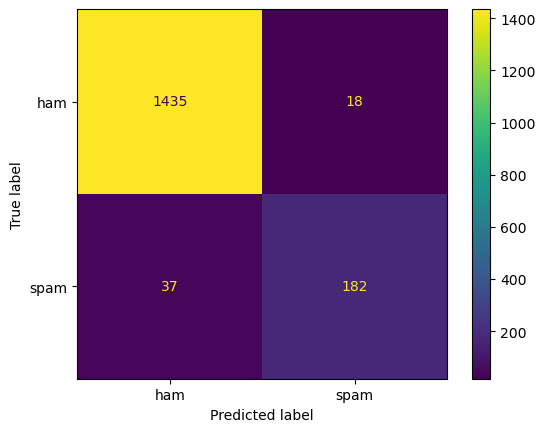

In [130]:
y_pred = naiv_bayes.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(dtcls, X_test_tfidf, y_test)
plt.show()

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.69      0.82       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



____________________________________________________________________________________________________________________________